In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

In [2]:
Data = pd.read_csv("Seshat Data.csv")

In [3]:
Data

,NGA,PolID,Time,PolPop,PolTerr,CapPop,levels,government,infrastr,writing,texts,money,SPC1,MG_corr
0,Big Island Hawaii,Hawaii1,1000,3.854914,4.111759,2.282858,-0.653777,0.090909,0.100000,0.100000,0.100000,1.8,0.203229,0
1,Big Island Hawaii,Hawaii1,1100,3.854914,4.111759,2.282858,-0.653777,0.090909,0.100000,0.100000,0.100000,1.8,0.203229,0
2,Big Island Hawaii,Hawaii2,1200,3.750606,3.337475,3.363416,1.060611,0.090909,0.090909,0.150000,0.000000,1.8,0.222845,0
3,Big Island Hawaii,Hawaii2,1300,4.065673,3.337475,3.429545,0.943410,0.090909,0.090909,0.150000,0.000000,1.8,0.228982,0
4,Big Island Hawaii,Hawaii2,1400,4.192464,3.337475,3.584463,1.993130,0.090909,0.181818,0.150000,0.000000,1.8,0.258405,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,Yemeni Coastal Plain,YeRasul,1400,5.881658,6.536808,4.698970,4.500000,0.977778,0.950000,1.000000,1.000000,4.5,0.801720,1
860,Yemeni Coastal Plain,YeTahir,1500,5.454290,5.762184,5.171692,4.500000,0.888889,0.966667,1.000000,1.000000,5.0,0.797062,1
861,Yemeni Coastal Plain,TrOttm3,1600,7.447158,6.684486,5.819190,8.036426,0.990909,0.916667,1.000000,1.000000,5.0,0.958307,1
862,Yemeni Coastal Plain,YeQasmi,1700,5.418268,5.553020,3.661252,3.000000,0.572727,0.272727,0.833333,0.814286,5.0,0.568928,1


## SPC1 Break Point for RelTime


In [4]:
np.median(Data["SPC1"])

0.356081775

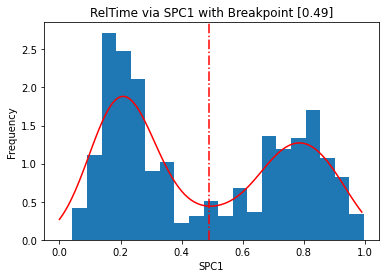

In [5]:
plt.hist(Data["SPC1"], bins = 20, density = True)

x = np.arange(0,1,0.01)
KDE = gaussian_kde(Data["SPC1"])(x)
KDE_min = np.min(KDE[20:80])  # find the minimum in the centre
xmin = x[KDE == KDE_min] # x-position of the minimum
plt.plot(x, KDE, c="red")
plt.axvline(xmin, linestyle="-.",c="red", )
plt.title("RelTime via SPC1 with Breakpoint "+str(np.round(xmin,2)))
plt.xlabel("SPC1")
plt.ylabel("Frequency")
plt.show()

SPC_Break = xmin

### IDEA

If this is too restrictive, maybe choose the first maximum around 0.2 as the "Time Zero". Aka the first emergence of medium-to-large structure.

PolPop


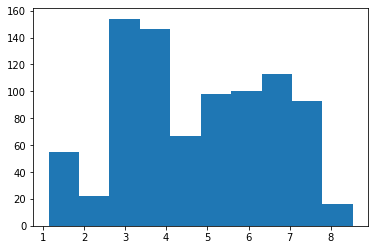

PolTerr


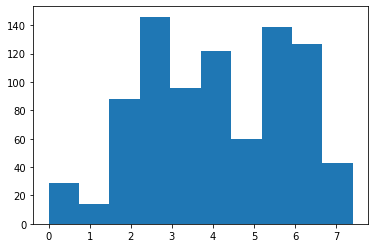

CapPop


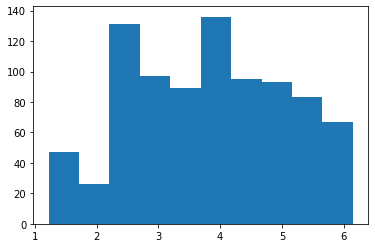

levels


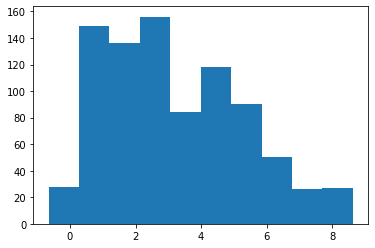

government


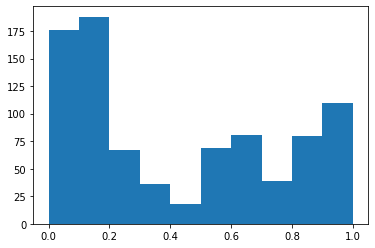

infrastr


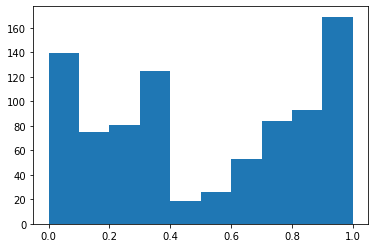

writing


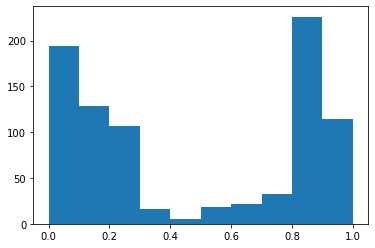

texts


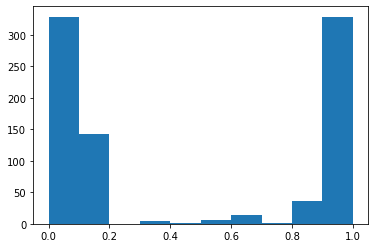

money


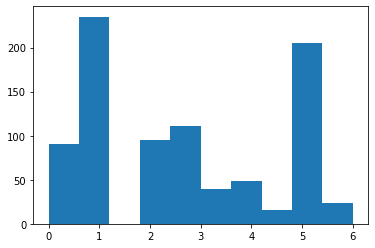

SPC1


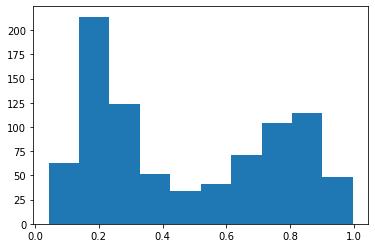

In [6]:
for i in range(3,13):
    print(Data.columns[i])
    plt.hist(Data[Data.columns[i]])
    #plt.set_title(Data.columns[i])
    plt.show()

In [7]:
# Next, we define a relative time scale (RelTime) with 0 at the time when the SPC1 trajectory crosses the 5.3 threshold

In [8]:
NGA = Data["NGA"][0]
print(Data[Data["NGA"] == NGA])

                 NGA    PolID  Time    PolPop   PolTerr    CapPop    levels  \
0  Big Island Hawaii  Hawaii1  1000  3.854914  4.111759  2.282858 -0.653777   
1  Big Island Hawaii  Hawaii1  1100  3.854914  4.111759  2.282858 -0.653777   
2  Big Island Hawaii  Hawaii2  1200  3.750606  3.337475  3.363416  1.060611   
3  Big Island Hawaii  Hawaii2  1300  4.065673  3.337475  3.429545  0.943410   
4  Big Island Hawaii  Hawaii2  1400  4.192464  3.337475  3.584463  1.993130   
5  Big Island Hawaii  Hawaii2  1500  4.599847  3.337475  3.807048  4.564236   
6  Big Island Hawaii  Hawaii2  1600  4.440997  3.337475  2.308375  2.584892   
7  Big Island Hawaii  Hawaii3  1700  5.011752  3.973290  3.442766  3.153204   
8  Big Island Hawaii  USKameh  1800  5.192031  4.226199  4.363033  3.534543   

   government  infrastr   writing  texts  money      SPC1  MG_corr  
0    0.090909  0.100000  0.100000    0.1    1.8  0.203229        0  
1    0.090909  0.100000  0.100000    0.1    1.8  0.203229        0  
2 

In [9]:
NGAlist = list(set(Data["NGA"]))
print(len(NGAlist))
LargeNGAs = []

for NGA in NGAlist:
    Subset = Data[Data["NGA"] == NGA]
    Logical = np.max(Subset["SPC1"]) > SPC_Break # Is this polity large enough to cross the SPC1 threshold?
    print("Is " +NGA+" large enough?",  Logical)
    if Logical:
        LargeNGAs.append(NGA)
    #print(Subset)
print(LargeNGAs)

30
Is Upper Egypt large enough? [ True]
Is Niger Inland Delta large enough? [ True]
Is Lowland Andes large enough? [False]
Is Yemeni Coastal Plain large enough? [ True]
Is Valley of Oaxaca large enough? [False]
Is Cahokia large enough? [False]
Is Lena River Valley large enough? [False]
Is Southern China Hills large enough? [False]
Is Paris Basin large enough? [ True]
Is Latium large enough? [ True]
Is Konya Plain large enough? [ True]
Is Cambodian Basin large enough? [ True]
Is Susiana large enough? [ True]
Is Ghanaian Coast large enough? [ True]
Is Garo Hills large enough? [False]
Is Oro PNG large enough? [False]
Is Deccan large enough? [ True]
Is Iceland large enough? [ True]
Is Central Java large enough? [ True]
Is Kachi Plain large enough? [ True]
Is Orkhon Valley large enough? [ True]
Is Sogdiana large enough? [ True]
Is Kansai large enough? [ True]
Is Finger Lakes large enough? [False]
Is Kapuasi Basin large enough? [False]
Is Chuuk Islands large enough? [False]
Is North Colombia

In [10]:
Seshat_Large = Data[Data["NGA"].isin(LargeNGAs)]
print(Seshat_Large)


                      NGA    PolID  Time    PolPop   PolTerr    CapPop  \
33        Cambodian Basin  KhFunaE   300  6.235249  5.409991  3.301030   
34        Cambodian Basin  KhFunaE   400  6.235249  5.409991  3.301030   
35        Cambodian Basin  KhFunaE   500  6.235249  5.409991  3.301030   
36        Cambodian Basin  KhFunaL   600  5.254599  5.421933  3.301030   
37        Cambodian Basin  KhChenl   700  6.393323  5.725095  4.778151   
..                    ...      ...   ...       ...       ...       ...   
859  Yemeni Coastal Plain  YeRasul  1400  5.881658  6.536808  4.698970   
860  Yemeni Coastal Plain  YeTahir  1500  5.454290  5.762184  5.171692   
861  Yemeni Coastal Plain  TrOttm3  1600  7.447158  6.684486  5.819190   
862  Yemeni Coastal Plain  YeQasmi  1700  5.418268  5.553020  3.661252   
863  Yemeni Coastal Plain  YeQasmi  1800  5.418268  5.553020  3.661252   

       levels  government  infrastr   writing     texts  money      SPC1  \
33   2.666667    0.618182  0.977778

## Now for the RelTime


In [11]:
Data_RT = pd.DataFrame(columns = Seshat_Large.columns)

for NGA in list(set(Seshat_Large["NGA"])):
    NGA_dat = Seshat_Large[Seshat_Large["NGA"] == NGA]
    NGA_TimeZero =NGA_dat["Time"].loc[NGA_dat["SPC1"]> SPC_Break[0]].iloc[0]
    print(NGA,NGA_TimeZero)
    
    NGA_dat["Time"] = NGA_dat["Time"]-NGA_TimeZero
    Data_RT = pd.concat([Data_RT, NGA_dat])
    print(NGA_dat[["Time", "SPC1"]])
    print(" ________________________ ")

Susiana -3700
     Time      SPC1
662 -4100  0.129737
663 -4000  0.129737
664 -3900  0.129737
665 -3800  0.129737
666 -3700  0.129737
..    ...       ...
753  5000  0.818716
754  5100  0.872746
755  5200  0.812770
756  5300  0.839888
757  5400  0.839888

[96 rows x 2 columns]
 ________________________ 
Upper Egypt -3100
     Time      SPC1
758 -1300  0.151832
759 -1200  0.151832
760 -1100  0.151832
761 -1000  0.151832
762  -900  0.151832
..    ...       ...
815  4400  0.893062
816  4500  0.893949
817  4600  0.883268
818  4700  0.958307
819  4800  0.957502

[62 rows x 2 columns]
 ________________________ 
Paris Basin -200
     Time      SPC1
559 -3000  0.227195
560 -2900  0.227195
561 -2800  0.227195
562 -2700  0.227195
563 -2600  0.227195
564 -2500  0.227195
565 -2400  0.227195
566 -2300  0.227195
567 -2200  0.227195
568 -2100  0.227195
569 -2000  0.225325
570 -1900  0.225325
571 -1800  0.225325
572 -1700  0.225325
573 -1600  0.225325
574 -1500  0.225325
575 -1400  0.225325
576 -1300  

C:\Users\Tobias\AppData\Local\Temp/ipykernel_9760/3816816974.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NGA_dat["Time"] = NGA_dat["Time"]-NGA_TimeZero
C:\Users\Tobias\AppData\Local\Temp/ipykernel_9760/3816816974.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NGA_dat["Time"] = NGA_dat["Time"]-NGA_TimeZero
C:\Users\Tobias\AppData\Local\Temp/ipykernel_9760/3816816974.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_in

In [12]:
Data_RT.rename(columns={'Time':'RelTime'}, inplace=True)
Data_RT

,NGA,PolID,RelTime,PolPop,PolTerr,CapPop,levels,government,infrastr,writing,texts,money,SPC1,MG_corr
662,Susiana,IrPrCer,-4100,1.597045,1.844231,2.591618,1.000000,0.090000,0.181818,0.000000,0.000,0.9,0.129737,0
663,Susiana,IrPrCer,-4000,1.597045,1.844231,2.591618,1.000000,0.090000,0.181818,0.000000,0.000,0.9,0.129737,0
664,Susiana,IrPrCer,-3900,1.597045,1.844231,2.591618,1.000000,0.090000,0.181818,0.000000,0.000,0.9,0.129737,0
665,Susiana,IrPrCer,-3800,1.597045,1.844231,2.591618,1.000000,0.090000,0.181818,0.000000,0.000,0.9,0.129737,0
666,Susiana,IrPrCer,-3700,1.597045,1.844231,2.591618,1.000000,0.090000,0.181818,0.000000,0.000,0.9,0.129737,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,Cuzco,PeInca*,0,7.331048,6.105330,4.678394,5.591314,0.581818,0.758333,0.428571,0.000,1.8,0.594646,0
75,Cuzco,PeInca*,100,6.871991,6.105330,4.678394,5.591314,0.581818,0.758333,0.428571,0.000,1.8,0.602291,0
122,Ghanaian Coast,GhAshnE,-200,6.020137,1.769219,4.519068,4.000000,0.172727,0.325000,0.333333,0.000,3.0,0.419548,1
123,Ghanaian Coast,GhAshnE,-100,6.020137,1.769219,4.519068,4.000000,0.172727,0.325000,0.333333,0.000,3.0,0.419548,1


## Comparison

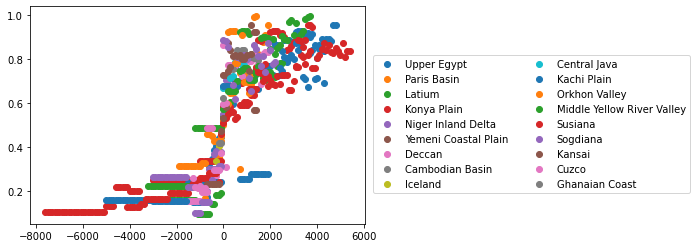

In [13]:
for N in list(set(Data_RT["NGA"])):
    DF = Data_RT[Data_RT["NGA"] == N]
    plt.scatter(DF["RelTime"], DF["SPC1"], label=N)
plt.legend(bbox_to_anchor=(1.01, 0.8), ncol=2)
plt.show()

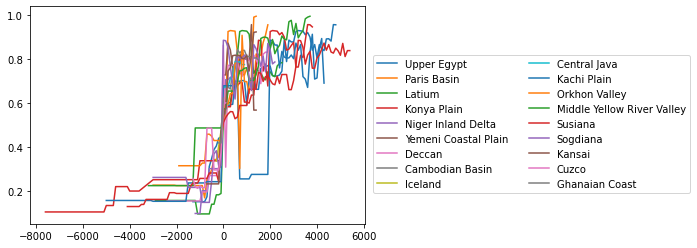

In [14]:
for N in list(set(Data_RT["NGA"])):
    DF = Data_RT[Data_RT["NGA"] == N]
    plt.plot(DF["RelTime"], DF["SPC1"], label=N)
    #print(N)
plt.legend(bbox_to_anchor=(1.01, 0.8), ncol=2)
plt.show()

## Fitting

Fit logistic model to the data set. Then, try cross-valdiation by fitting on some time series and predicting the others.

In [15]:
import scipy.optimize as opt


In [16]:
X, y = Data_RT["RelTime"].to_numpy(), Data_RT["SPC1"].to_numpy()
T = 5000
X = np.array(list(X)) # for some reason, this transformation is necessary
X = X/T # normalisation of the data

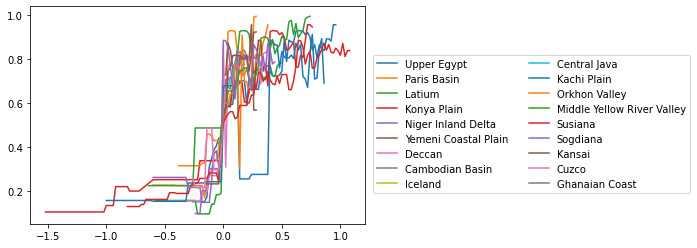

In [17]:
for N in list(set(Data_RT["NGA"])):
    DF = Data_RT[Data_RT["NGA"] == N]
    plt.plot(DF["RelTime"]/T,    # ALSO normalised
             DF["SPC1"], label=N)
    #print(N)
plt.legend(bbox_to_anchor=(1.01, 0.8), ncol=2)
plt.show()

In [18]:
def f(x, a, b, c, d):
    # the logistic function in its most general shape
    return a / (1. + np.exp(-c * (x - d))) + b

The parameter c (or rather 1/c) corresponds to a time scale of the temporal evolution.

In [19]:
(a_, b_, c_, d_), _ = opt.curve_fit(f, X, y)


In [20]:
print(a_, b_, c_, d_)
x_show = np.arange(min(X), max(X)+1000/T,100/T) # evaluate the estimated function here
y_hat = f(x_show, a_, b_, c_, d_)

0.5916410124510705 0.19378486483092658 19.37492675376029 -0.015432137855364257


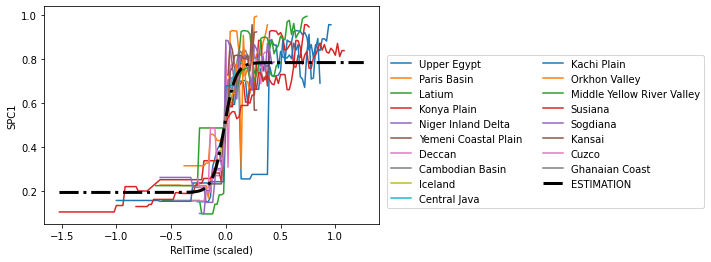

In [21]:
for N in list(set(Data_RT["NGA"])):
    DF = Data_RT[Data_RT["NGA"] == N]
    plt.plot(DF["RelTime"]/T,    # ALSO normalised
             DF["SPC1"], label=N)
    #print(N)
    
plt.plot(x_show, y_hat, "-.",label="ESTIMATION", c = "k", linewidth=3)
plt.legend(bbox_to_anchor=(1.01, 0.8), ncol=2)
plt.xlabel("RelTime (scaled)")
plt.ylabel("SPC1")
plt.show()

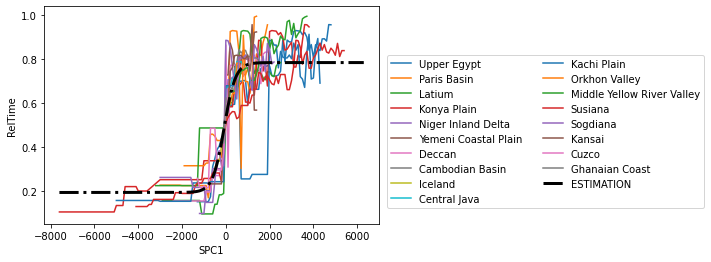

In [22]:
for N in list(set(Data_RT["NGA"])):
    DF = Data_RT[Data_RT["NGA"] == N]
    plt.plot(DF["RelTime"],    # ALSO normalised
             DF["SPC1"], label=N)
    #print(N)
    
plt.plot(x_show*T, y_hat, "-.",label="ESTIMATION", c = "k", linewidth=3)
plt.legend(bbox_to_anchor=(1.01, 0.8), ncol=2)
plt.ylabel("RelTime")
plt.xlabel("SPC1")
plt.show()

#### Residuals

In [23]:
y_est = f(X,a_, b_, c_, d_)

In [24]:
RMSE = (np.sum((y_est-y)**2) / len(y)  )**0.5
print(RMSE)

0.11299071583111997


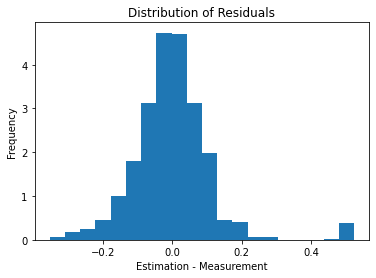

In [25]:
plt.hist(y_est-y,bins = 20, density = True)
plt.title("Distribution of Residuals")
plt.xlabel("Estimation - Measurement")
plt.ylabel("Frequency")
plt.show()

#### Bootstrapping

Will lead to some uncertainty values for our parameters. Hence, we might want to throw away some of them as a possible zero-value (prime candidate for this is the parameter d). The bootstrapped uncertainty for c will tell us more about the range of possible time scales for the temporal evolution and, by judging the width of this uncertainty, if there is a universal time scale.

In [26]:
Data_Reduced = Data_RT[["NGA", "RelTime", "SPC1"]]
NGA_red = list(set(Data_RT["NGA"]))


In [27]:
import random
random.seed(1234)
nBT = 1000 # how many Bootstraps

Params = pd.DataFrame(columns = ["a", "b", "c", "d"]) # df of the parameters

for i in range(nBT):
    NGA_selection = random.choices(NGA_red,k=len(NGA_red))
    Data_Bootstrap = pd.DataFrame(columns = Data_Reduced.columns)

    for n in NGA_selection:
        Data_Bootstrap = pd.concat([Data_Bootstrap, Data_Reduced[Data_Reduced["NGA"]==n]])
    
    
    X, y = Data_Bootstrap["RelTime"].to_numpy(), Data_Bootstrap["SPC1"].to_numpy()

    X = np.array(list(X)) # for some reason, this transformation is necessary
    X = X/T # normalisation of the data
    (a_, b_, c_, d_), _ = opt.curve_fit(f, X, y)

    Params = pd.concat([Params,
                       pd.DataFrame(data={"a":[a_], "b":[b_], "c":[c_], "d":[d_]})])
    print(a_, b_, c_, d_)
print(Params.round(2))

0.6136449168295691 0.18538079956451867 14.238634556257214 -0.008165242035190229
0.5167707187236804 0.1977939811828883 33.52620629567792 -0.02356753159482812
0.6077948831960938 0.15933737383505261 21.75810372913617 -0.010443875657844227
0.06300587853475487 0.42577641098436714 -7.299794627989987 9.435261808700126
0.5892068405272095 0.21138540435370623 27.255459231037158 -0.0100474705283468
0.5918066611169248 0.225955129663892 24.38624195839109 -0.010944695758575582
0.24844372800524278 0.5005831796082463 -7.5220997749985585 -8.492761289019766
0.6325863639285199 0.17777933922077513 12.735577863540625 -0.006872013283122117
-2.1284043806263893 2.6320309792969616 8.294735393186375 -10.18790118100275
0.5787516660248 0.1933161303611645 21.79649361287607 -0.020430599251552963
0.589020731365878 0.19528613280867488 14.923445836722081 -0.014328393384469394
0.5465386354760146 0.19719319239870128 45.00228694726781 -0.021929038641790362
0.622224938848883 0.19268831118267524 15.147281675483807 -0.01315

C:\Users\Tobias\anaconda3\lib\site-packages\scipy\optimize\minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',



0.6559500285571983 0.16439027223976058 8.99041598436719 -0.006092843964744684
1.6952920930915574 -1.1903453777385278 -7.46533649444291 7.450558223529988
0.5578292448004196 0.18863935537159005 34.30162133261116 -0.018239150203462312
0.6233676492348857 0.19934978359981642 18.815825700973317 -0.004732137547415937
0.6453365664764138 0.1692709501100027 11.50822952817785 -0.023588158674180227
-0.27888763807658523 0.7700248265281175 -5.635259447499039 7.816070215726162
0.024960697806056142 0.447056640211811 9.956280088149857 -15.74918837317416
0.6517172558409744 0.2225379946159874 11.090868521434166 -0.004771749969568417
0.5470794433857548 0.21331394986441857 157.7124602873256 -0.012671088929996568
-0.03975832074370969 0.4926165151549976 4.343585678625123 -6.086789155382366
0.6591230581883097 0.16615891314610048 10.41943372805479 -0.013272470182602
0.6568178508990773 0.14790217210135648 7.153666393275046 -0.0036876820177736374
0.5941466629190512 0.19532130245751408 20.0392965879323 -0.010227

0.5371223445181116 0.2006823832636248 63.152732313135196 -0.014799134228968397
0.6240528797030482 0.18504607060935863 12.275559819041822 -0.015188667755247971
0.7506198991707168 -0.21678367378123423 -5.233679085929401 6.32679314372366
0.5852382778710348 0.18744483683265678 29.357671986216193 -0.014347986198842734
0.613834542217202 0.1829070313288287 22.462334419522215 -0.011263515882486322
0.6187292780477532 0.1614229629613597 8.723359957706503 -0.010778496814220344
0.5790287577767385 0.20627171452508825 23.827001358066465 -0.012585026639146298
-0.1543953182834198 0.7060387939296161 -7.132975184663718 6.8792170971547115
0.5948743614129174 0.1723396088211245 23.735193224736882 -0.01687213458996489
0.654061588095035 0.1779120217003496 9.542328117395869 -0.009285437570245731
0.5800100949277734 0.19576718237039423 23.622013443855703 -0.021834032094645465
0.590434717749675 0.1959617452849017 19.52718811431414 -0.02103948157098592
0.5951860515927927 0.18733810005143425 19.608254797438107 -0.

0.5752298357336229 0.1851695507787528 28.899890088377184 -0.018691459601881583
0.6279529987915708 0.18296069792967196 14.213439515484195 -0.00834604910021829
0.033972287772851884 0.5820161126209579 -6.1018009292784265 6.053297014174176
0.599401000288847 0.17344307701737421 13.905935919785085 -0.022131941231983497
0.6157852855108569 0.18488919830711278 16.25977501373528 -0.013696771075312964
0.6619515980936361 0.17503662635441591 7.679251281852938 0.004993661550187417
0.6779374010415993 0.15350648999007652 6.928466338681908 -0.005860512689476456
0.6128464292555372 0.19495855810775156 20.511393399068545 -0.008271654378996877
0.6118346972433333 -0.11462259056531435 -6.968446048287554 4.14624412533603
0.5467008073728662 0.1820966356130333 41.49890774381458 -0.016340647908295876
0.6647901261693828 0.17161245498460095 8.5527775645454 -0.008341991329986665
0.0961978689899231 0.4606763539262817 -6.20767726934843 -4.416242532852257
3.434887506151247 -2.939279999177583 -7.0779459427186175 6.2422

0.5969605517507979 0.18149019439388256 17.59849406041887 -0.013819014745253872
0.6060420747213942 0.20219862123975432 14.85104774501102 -0.016941958730130175
0.5856095718145378 0.20708689803737598 16.577558485540372 -0.017705137136809743
0.592653273090552 0.18492423178903863 19.332789713361002 -0.014911155426366
0.5901259126653925 0.22543595716037723 26.338556533651264 -0.010086907746569972
0.5864355180899627 0.20673886513471018 26.87920921977622 -0.011214911320860124
0.6316325945902691 0.18068640825635715 12.884360794296718 -0.0061693422092415585
0.6854039118402449 0.15980216202807712 7.6206255998673065 -0.0016956618813631912
0.5837101290140749 0.1869988620472872 32.283053856855865 -0.009665703930398747
0.6207087123626942 0.1613536996004446 10.674009126166146 -0.01215515199320619
0.5482286094691268 0.19681888258708988 44.37404392139653 -0.016658281189551687
0.6239052128624657 0.1625275358203931 10.493357643489057 -0.006607350555509146
-0.15317077169282323 0.6489027324861629 -6.7563867

-0.5846043330623907 0.7725736138898693 -22.198659596962695 -0.017574325210586002
0.655315850512567 0.16965419198395743 9.930763209696636 -0.003533856945402044
0.5654023846309744 0.20572184990467585 28.301246516108165 -0.012283709562562193
0.5909298977835891 0.18241309617662846 23.089433004169305 -0.013059980628262274
-1.324630383612127 1.7747952195465986 -9.085451237314286 12.983845006999026
0.6516426134947938 0.18399867946459744 10.076062644819787 -0.02233595542689769
0.6142950569918717 0.19297958635439172 19.037265686263883 -0.005525050483874226
0.4213420297034327 0.06889014414494905 -5.677363829498139 5.308340310537859
0.6087483039393804 0.17470604066716156 19.27119383036196 -0.01503432113197911
0.6892842502668061 0.13781812162420834 5.970779635133756 0.017511611726862535
0.5499263791297831 0.21854047052205092 37.67573436472156 -0.013737383683184539
0.5611713001416444 0.19307522600574378 32.45691474395366 -0.0153905681420956
0.6659836671937921 0.17545218032918083 8.15091349114025 -0

-0.6189198403944612 0.7955344733725584 -21.44221158182242 -0.011347480178436776
0.6067812493995756 0.18790729816276028 19.321642531282368 -0.015050371079655681
0.6686126613624296 0.16722090852995306 8.554311400487792 -0.0046584550696063326
0.5824604104942086 0.19415265476898128 26.35530984995167 -0.014784799132520524
0.6353504210760934 0.16723301425186635 10.175918664152887 -0.014588543352906143
0.4764010838266422 0.010779785992878358 -2.623556438395833 8.902794180506485
0.6233241358355534 0.15696892958909703 8.672308677106454 -0.005616114849211769
0.5774159265922606 0.1930316729445842 17.29011726103535 -0.024018222351323597
-0.19316809542806768 0.7347905662707193 -9.914526245442714 6.733651350243344
0.5803575201682671 0.21014132406143163 21.986779554099893 -0.019033973937286276
0.6152342325980362 0.18871116510737246 16.70973266105631 -0.012308739523441635
0.6493297293764845 0.15802904015054803 9.917565861331045 -0.006185868888231872
0.5381578218462566 0.19983882646948734 34.2848159605

0.654508752808487 0.17273297598275167 11.810299600274561 0.00040067731943900693
-2.6733284400455406 3.1365574447173943 8.733958561164648 -13.650965206324742
0.6053472513783978 0.18027979481207929 15.235203510200979 -0.016020176981533355
0.8674106513762538 -0.3891209555086226 11.629233010964208 -11.099742050177541
-6.825972593368545 7.303274443734689 -28.89064789408971 15.864166233875828
0.5872306297301073 0.21429375746971077 37.68590697320569 -0.010299164621843769
0.6127747802877684 0.19820842882547451 18.892462187902748 -0.002622128953389124
0.5791009359788466 0.1971656114173332 23.204106845834723 -0.017658658153716072
0.5613192999467512 0.20382633297928918 28.843932839956636 -0.015339661789025422
0.5934817820541629 0.19376303336115328 18.344316504077682 -0.010027915848937361
0.5509296826008846 0.21066380174945148 32.16780883064831 -0.017108070988361992
0.5416019259761194 0.22653505196078388 36.698053122079884 -0.014149480020087387
0.7266984542202614 0.12916624611259328 5.270223281921

0.6334820982783294 0.17286991992054643 8.729715181754722 -0.020769218288716924
-0.5886545033149964 0.8026824928148024 -17.13265165774114 -0.014450337945481272
0.6119383758090868 0.1725951029691664 13.618550817825707 -0.009454672888655655
0.6235542888900165 0.17648873967254683 16.89268367403911 -0.003858502803254538
0.5736345434200337 0.1910060767567971 30.232800676496833 -0.016821469748408684
0.5623232993421039 0.19058675836218614 34.391492257801254 -0.01545438401219777
0.5842112787714389 0.19000754871687897 17.6061888468933 -0.015694381534818013
0.5655445897067221 0.19112509965600827 34.41382400116176 -0.014049098012704755
0.5257588506291915 0.20517962962862257 55.577270901455464 -0.015821985909772608
0.6243922701488693 0.1971850758599188 16.66590155190308 -0.0064698165675495505
0.3575731131814184 0.4894068045326932 -6.952194299714783 -4.648051928794584
0.6374263328493153 0.17379887113844797 16.058814209021723 -0.0009579264829860101
0.6633779591021973 0.16870527627190313 9.64996622005

0.6861934834797286 0.16878226157846796 8.676113855222301 -0.00396978087749394
0.5558171390196509 0.19679382059544578 44.07101126384081 -0.01646455071863619
0.60452538296733 0.17388693974600206 19.87340111754604 -0.008718521419509295
0.6068045300866466 0.197634224513927 21.93094997025753 -0.013431469412985595
0.3448156724810919 0.492154173050645 -8.139309339910234 -8.666072750050162
0.7096150296266279 -0.1684167248617474 -7.7438861030205555 8.161321995954484
0.5992456690916007 0.18506938716269178 21.307259199060077 -0.014891144666031886
0.6188163521767766 0.17737964527587616 15.893992442909646 -0.014143204362996402
-1.6855215552048621 2.1387176570033333 6.753176915519553 -8.86931295356151
0.5848074158951782 0.18928473949304547 23.968778078458264 -0.012890321049125004
0.6473332158348218 0.1880589068380595 12.021156296279523 -0.004080253699323139
0.6578461388025846 0.16783703509682063 7.616455558793205 -0.0074256310696042185
5.237229891004462 -4.724648387250011 -10.627380468140629 6.28389

In [28]:
Params.columns

Index(['a', 'b', 'c', 'd'], dtype='object')

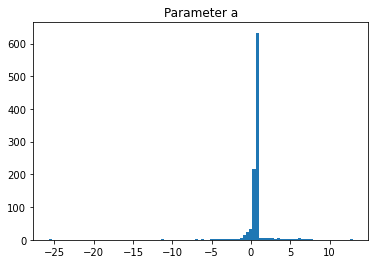

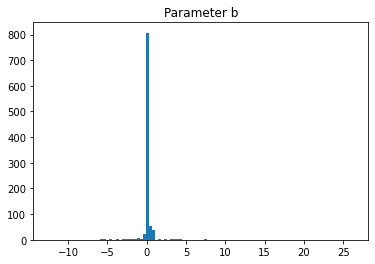

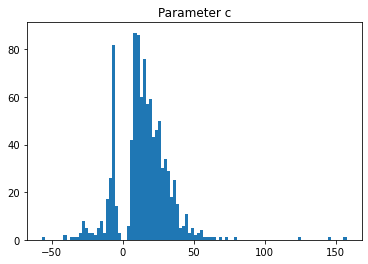

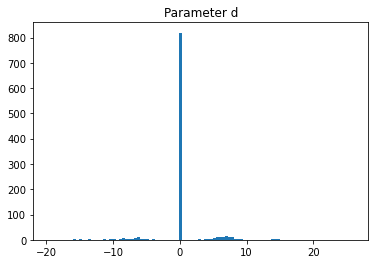

In [29]:
for P in Params.columns:
    
    plt.hist(Params[P],bins=100)
    plt.title("Parameter "+str(P))
    plt.show()

Negative values for c, the time index? That does not sound very sensible. I think I'd have to check what was going on there...

### Cross-Validation